# Use DKRZ cloud (swift) catalog

In [1]:
# direct link to catalog files, but let us use the master catalog and navigate to the cloud catalog
cat_file_public = "https://gitlab.dkrz.de/data-infrastructure-services/intake-esm/-/raw/master/esm-collections/cloud-access/dkrz_cmip6_cloud.json"
cat_file_dkrz = "/pool/data/Catalogs/dkrz_cmip6_cloud.json"

In [2]:
import numpy as np                    # fundamental package for scientific computing
import pandas as pd                   # data analysis and manipulation tool
import xarray as xr                   # handling labelled multi-dimensional arrays
import intake                         # to find data in a catalog, this notebook explains how it works

## Open DKRZ master catalog

In [3]:
dkrz_catalog=intake.open_catalog("/pool/data/Catalogs/dkrz_catalog.yaml")
list(dkrz_catalog)

['dkrz_cmip5_archive',
 'dkrz_cmip5_disk',
 'dkrz_cmip6_cloud',
 'dkrz_cmip6_disk',
 'dkrz_cordex_disk',
 'dkrz_dyamond-winter_disk',
 'dkrz_era5_disk',
 'dkrz_nextgems_disk',
 'dkrz_palmod2_disk']

### Navigate to cloud catalog

In [4]:
dkrz_cloud = dkrz_catalog.dkrz_cmip6_cloud
print(dkrz_cloud)

<dkrz_cmip6_cloud catalog with 67 dataset(s) from 480 asset(s)>


In [5]:
dkrz_cloud.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,version,uri,format
0,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,3hr,clt,gn,v20181218,https://swift.dkrz.de/v1/dkrz_0b2a0dcc-1430-4a...,zarr
1,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,3hr,hfls,gn,v20181218,https://swift.dkrz.de/v1/dkrz_0b2a0dcc-1430-4a...,zarr
2,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,3hr,hfss,gn,v20181218,https://swift.dkrz.de/v1/dkrz_0b2a0dcc-1430-4a...,zarr
3,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,3hr,pr,gn,v20181218,https://swift.dkrz.de/v1/dkrz_0b2a0dcc-1430-4a...,zarr
4,CMIP,AWI,AWI-CM-1-1-MR,historical,r1i1p1f1,3hr,prc,gn,v20181218,https://swift.dkrz.de/v1/dkrz_0b2a0dcc-1430-4a...,zarr


### Query the cloud catalog

In [6]:
query = dict(
    source_id      = 'MPI-ESM1-2-HR', # the model 
    variable_id    = "pr", 
    table_id       = "day", 
    experiment_id  = 'historical' 
)

# Intake looks for the query we just defined in the catalog of the CMIP6 data pool at DKRZ

cat = dkrz_cloud.search(**query)

# good practice to delete the memory consuming catalog if no longer needed
#del dkrz_cloud

# Show query results
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,version,uri,format
0,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,day,pr,gn,v20190710,https://swift.dkrz.de/v1/dkrz_0b2a0dcc-1430-4a...,zarr


## Access the data

In [7]:
xr_dict = cat.to_dataset_dict(cdf_kwargs=dict(chunks=dict(time=1)),
                             zarr_kwargs=dict(consolidated=True)
                                              #decode_times=True,
                                              #use_cftime=True)
                             )
xr_dict


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


{'CMIP.MPI-M.MPI-ESM1-2-HR.historical.day.gn': <xarray.Dataset>
 Dimensions:    (lat: 192, bnds: 2, lon: 384, time: 60265)
 Coordinates:
   * lat        (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
   * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
   * time       (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
 Dimensions without coordinates: bnds
 Data variables:
     lat_bnds   (lat, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
     lon_bnds   (lon, bnds) float64 dask.array<chunksize=(384, 2), meta=np.ndarray>
     pr         (time, lat, lon) float32 dask.array<chunksize=(3545, 192, 384), meta=np.ndarray>
     time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(30133, 1), meta=np.ndarray>
 Attributes: (12/49)
     Conventions:             CF-1.7 CMIP-6.2
     activity_id:             CMIP
     branch_method:           standard
     branch_time_in_child:    0.0
     branch_time_in_parent:   0

In [8]:
xr_dset = xr_dict.popitem()[1]
xr_dset

<xarray.Dataset>
Dimensions:    (lat: 192, bnds: 2, lon: 384, time: 60265)
Coordinates:
  * lat        (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time       (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(384, 2), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(3545, 192, 384), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(30133, 1), meta=np.ndarray>
Attributes: (12/49)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   0.0
    cmor_version:            3.5.0
    ...                      ...
    title:                   MPI-ESM1-2-HR output prepared for CMIP6
    tracking_id:             ['hdl:21.14100/de914887-f8e3-477c-9f8b-ccee4e718...
    variable_id:             pr
    variant_label:           r1i1p1f1
    intake_esm_varname:      ['pr']
    intake_esm_dataset_key:  CMIP.MPI-M.MPI-ESM1-2-HR.historical.day.gn

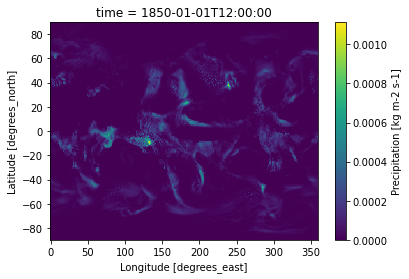

In [9]:
xr_dset.pr.isel(time=0).plot()